<a href="https://colab.research.google.com/github/NoahGal-19/Group8/blob/main/YIKE_QM2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

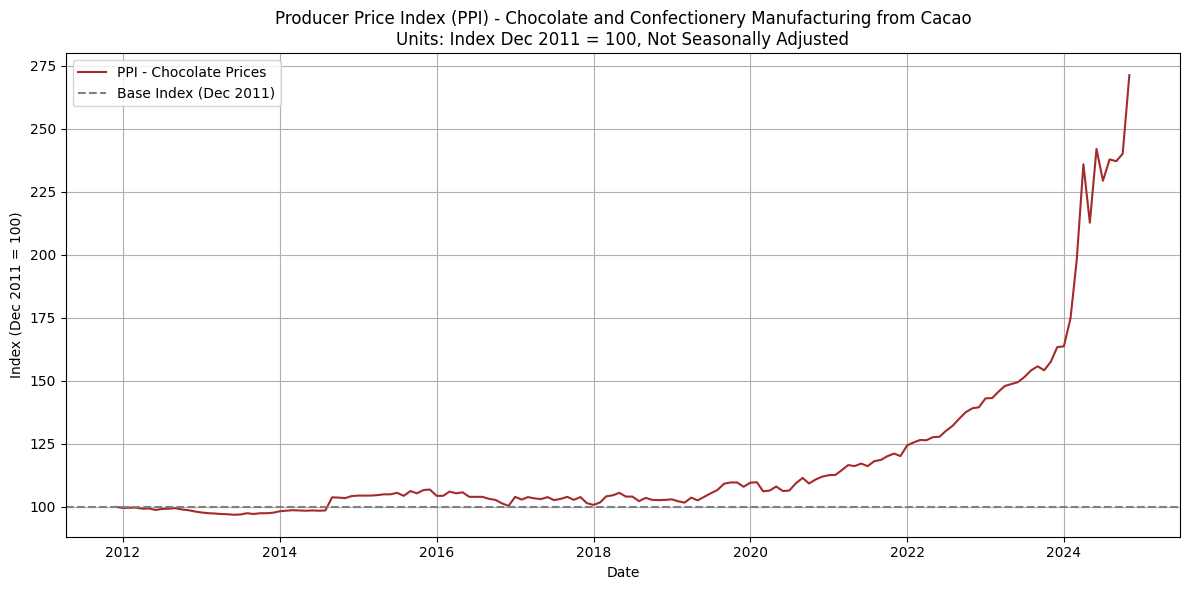

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Chocolate_Price.csv'
data = pd.read_csv(file_path)

# Convert observation_date to datetime
data['observation_date'] = pd.to_datetime(data['observation_date'], format='%Y-%m-%d')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['observation_date'], data['PCU311351311351'], linestyle='-', color='brown', label='PPI - Chocolate Prices')
plt.axhline(y=100, color='gray', linestyle='--', label='Base Index (Dec 2011)')

# Add titles and labels
plt.title('Producer Price Index (PPI) - Chocolate and Confectionery Manufacturing from Cacao\nUnits: Index Dec 2011 = 100, Not Seasonally Adjusted')
plt.xlabel('Date')
plt.ylabel('Index (Dec 2011 = 100)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

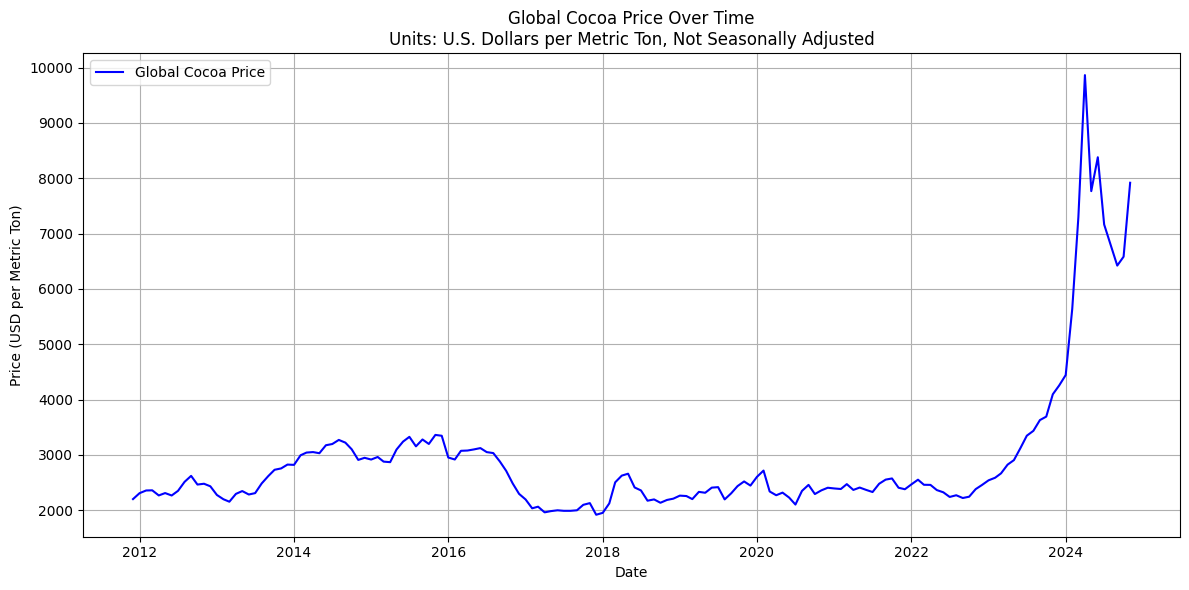

In [ ]:
file_path = 'Cocoa_Price.csv'
data = pd.read_csv(file_path)

# Convert observation_date to datetime
data['observation_date'] = pd.to_datetime(data['observation_date'], format='%d/%m/%Y')

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(data['observation_date'], data['PCOCOUSDM'], linestyle='-', label='Global Cocoa Price', color='blue')

# Add titles and labels
plt.title('Global Cocoa Price Over Time\nUnits: U.S. Dollars per Metric Ton, Not Seasonally Adjusted')
plt.xlabel('Date')
plt.ylabel('Price (USD per Metric Ton)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
#Correlation Analysis
cocoa_df = pd.read_csv('Cocoa_Price.csv')
chocolate_df = pd.read_csv('Chocolate_Price.csv')
cocoa_head = cocoa_df.head()
chocolate_head = chocolate_df.head()
print(cocoa_head)
print(chocolate_head)

  observation_date    PCOCOUSDM
0       01/12/2011  2200.605172
1       01/01/2012  2307.761849
2       01/02/2012  2356.239881
3       01/03/2012  2359.251293
4       01/04/2012  2266.782894
  observation_date  PCU311351311351
0       2011-12-01            100.0
1       2012-01-01             99.6
2       2012-02-01             99.7
3       2012-03-01             99.7
4       2012-04-01             99.3


In [ ]:
cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'

cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)

# Convert observation_date to datetime with the correct format
cocoa_df['observation_date'] = pd.to_datetime(cocoa_df['observation_date'], format='%d/%m/%Y')
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'], format='%Y-%m-%d')

# Merge the two dataframes on observation_date
merged_df = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

# Rename columns for clarity
merged_df.rename(columns={
    'PCOCOUSDM': 'Cocoa_Price',
    'PCU311351311351': 'Chocolate_Price'
}, inplace=True)

correlation_matrix = merged_df[['Cocoa_Price', 'Chocolate_Price']].corr(method='pearson')
print(merged_df.head())
print(correlation_matrix)

  observation_date  Cocoa_Price  Chocolate_Price
0       2011-12-01  2200.605172            100.0
1       2012-01-01  2307.761849             99.6
2       2012-02-01  2356.239881             99.7
3       2012-03-01  2359.251293             99.7
4       2012-04-01  2266.782894             99.3
                 Cocoa_Price  Chocolate_Price
Cocoa_Price          1.00000          0.87268
Chocolate_Price      0.87268          1.00000


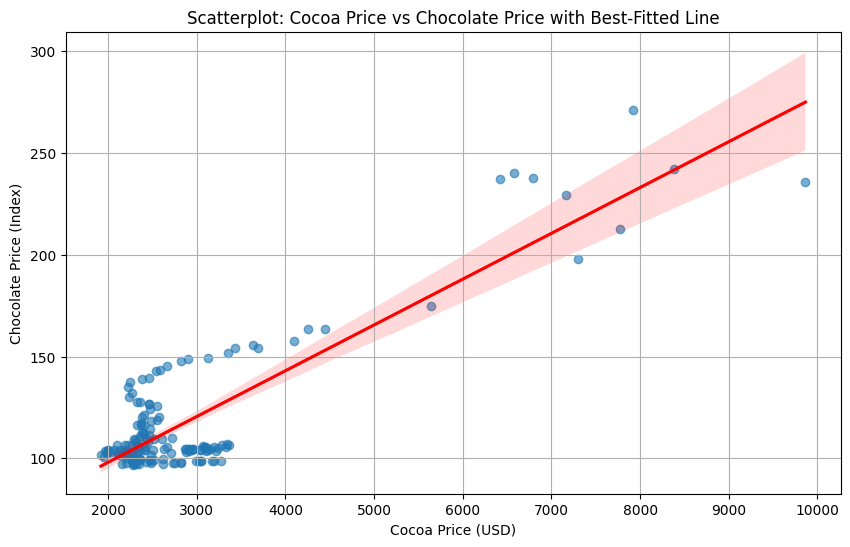

In [ ]:
import seaborn as sns
cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'

cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)

# Convert observation_date to datetime with consistent format
cocoa_df['observation_date'] = pd.to_datetime(cocoa_df['observation_date'], format='%d/%m/%Y')
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'], format='%Y-%m-%d')

# Rename columns for clarity
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')
plt.figure(figsize=(10, 6))
sns.regplot(x='Cocoa_Price', y='Chocolate_Price', data=data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
plt.title('Scatterplot: Cocoa Price vs Chocolate Price with Best-Fitted Line')
plt.xlabel('Cocoa Price (USD)')
plt.ylabel('Chocolate Price (Index)')
plt.grid(True)
plt.show()

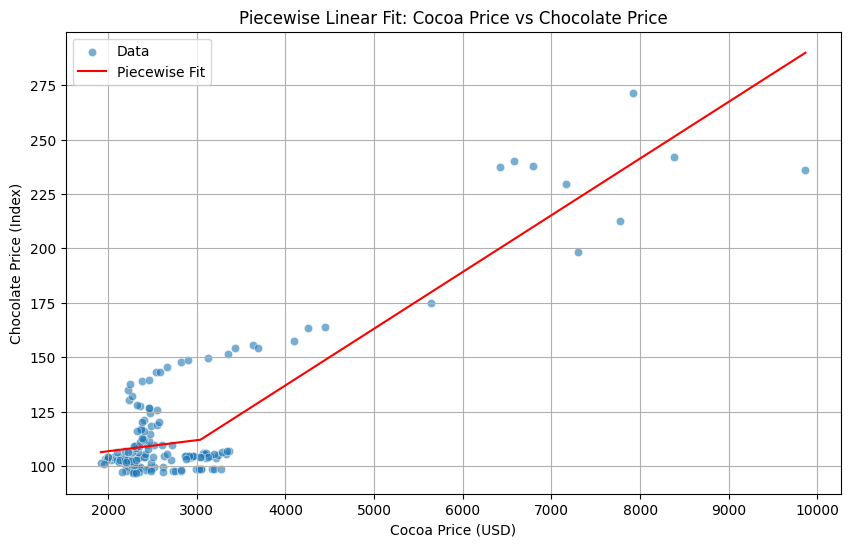

Breakpoint at Cocoa Price: 3041.67
Slope before breakpoint: 0.01
Slope after breakpoint: 0.03


In [ ]:
import seaborn as sns
from scipy.optimize import curve_fit

cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'
cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)

# Convert observation_date to datetime with correct format
cocoa_df['observation_date'] = pd.to_datetime(cocoa_df['observation_date'], format='%d/%m/%Y')
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'], format='%Y-%m-%d')

# Rename columns for clarity
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

# Merge datasets
data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

# Check if data is empty
if data.empty:
    print("No matching data found after merging. Please check the date ranges.")
else:
    # Piecewise linear function
    def piecewise_linear(x, x0, y0, k1, k2):
        """
        x0, y0: Breakpoint coordinates
        k1: Slope before breakpoint
        k2: Slope after breakpoint
        """
        return np.piecewise(x, [x < x0], [lambda x: k1 * (x - x0) + y0, lambda x: k2 * (x - x0) + y0])

    # Extract x and y
    x = data['Cocoa_Price'].values
    y = data['Chocolate_Price'].values

    # Initial parameter guess
    p0 = [np.median(x), np.median(y), 1, 1]

    # Fit the model
    try:
        params, _ = curve_fit(piecewise_linear, x, y, p0)

        # Plot results
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x='Cocoa_Price', y='Chocolate_Price', data=data, alpha=0.6, label='Data')
        x_fit = np.linspace(min(x), max(x), 100)
        y_fit = piecewise_linear(x_fit, *params)
        plt.plot(x_fit, y_fit, color='red', label='Piecewise Fit')

        plt.title('Piecewise Linear Fit: Cocoa Price vs Chocolate Price')
        plt.xlabel('Cocoa Price (USD)')
        plt.ylabel('Chocolate Price (Index)')
        plt.legend()
        plt.grid(True)
        plt.show()

        print(f"Breakpoint at Cocoa Price: {params[0]:.2f}")
        print(f"Slope before breakpoint: {params[2]:.2f}")
        print(f"Slope after breakpoint: {params[3]:.2f}")
    except RuntimeError as e:
        print("Curve fitting failed:", e)

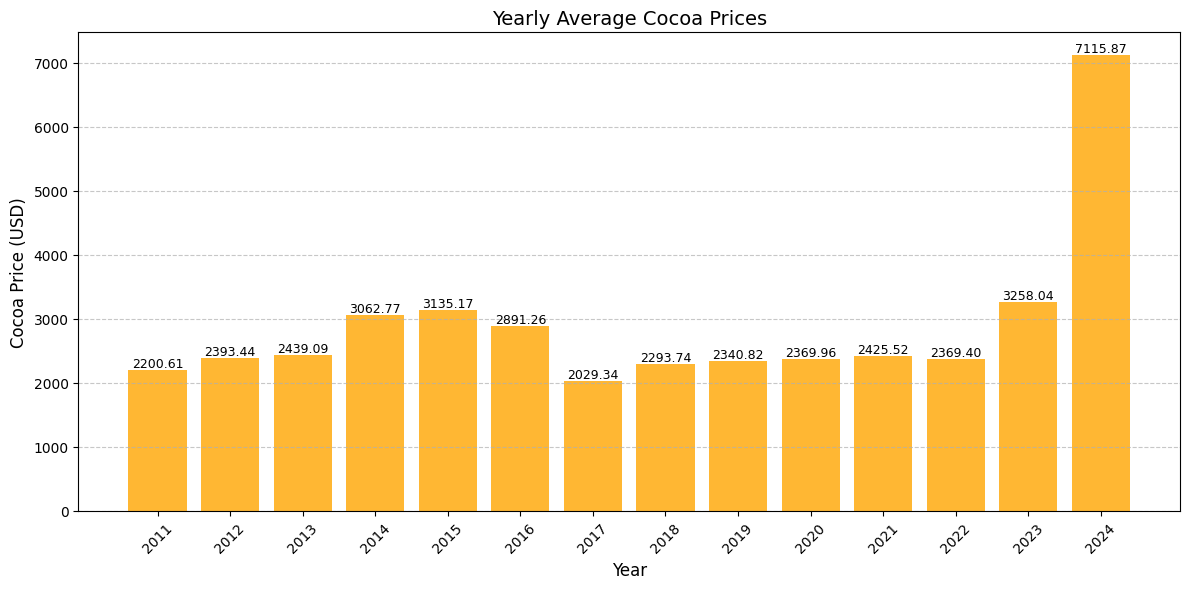

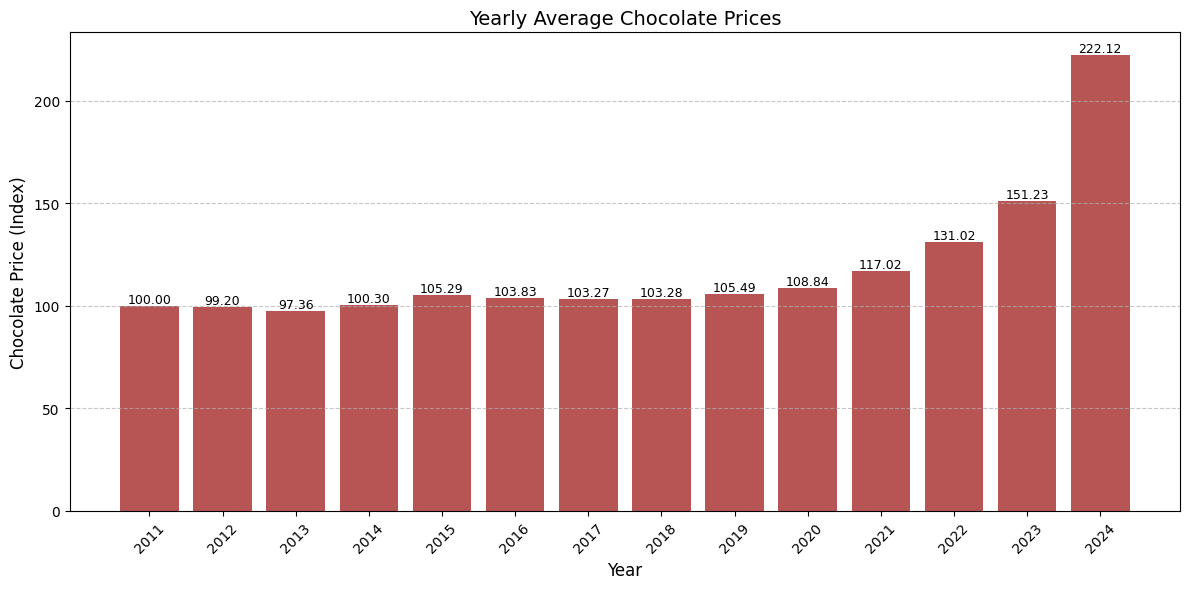

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

# Convert observation_date to datetime and merge datasets
cocoa_df['observation_date'] = pd.to_datetime(cocoa_df['observation_date'], format='%d/%m/%Y')
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'], format='%Y-%m-%d')

# Merge datasets on observation_date
data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

# Extract year from observation_date
data['Year'] = data['observation_date'].dt.year

# Calculate yearly averages
yearly_avg = data.groupby('Year')[['Cocoa_Price', 'Chocolate_Price']].mean()

# 1. Plot Cocoa Price Averages
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg.index, yearly_avg['Cocoa_Price'], color='orange', alpha=0.8)

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Yearly Average Cocoa Prices', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cocoa Price (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_avg.index, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# 2. Plot Chocolate Price Averages
plt.figure(figsize=(12, 6))
bars = plt.bar(yearly_avg.index, yearly_avg['Chocolate_Price'], color='brown', alpha=0.8)

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}', ha='center', va='bottom', fontsize=9)

plt.title('Yearly Average Chocolate Prices', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Chocolate Price (Index)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_avg.index, rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


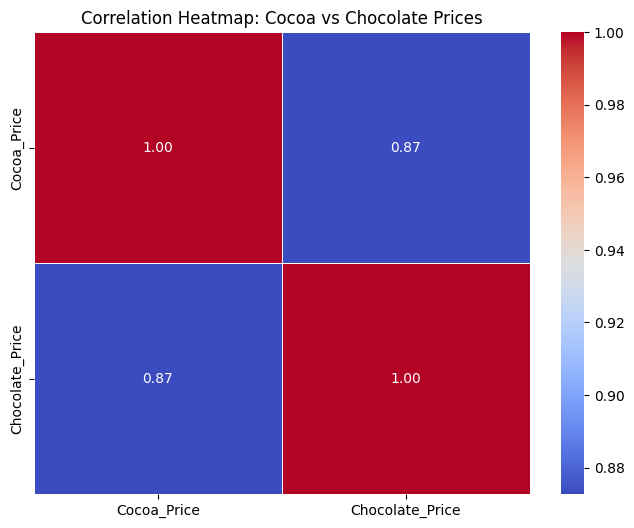

In [ ]:
import seaborn as sns
correlation = data[['Cocoa_Price', 'Chocolate_Price']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap: Cocoa vs Chocolate Prices')
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
<ipython-input-68-ce07a1269a95>:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_corr = data.groupby('Year').apply(lambda g: g['Cocoa_Price'].corr(g['Chocolate_Price']))


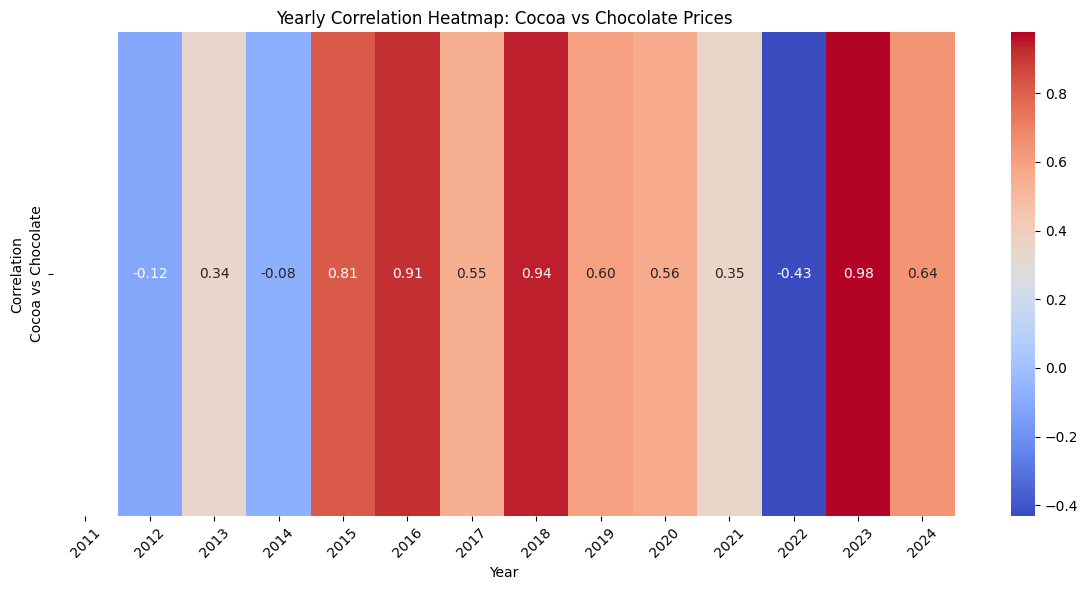

In [ ]:
cocoa_file_path = 'Cocoa_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'

cocoa_df = pd.read_csv(cocoa_file_path)
chocolate_df = pd.read_csv(chocolate_file_path)
cocoa_df.rename(columns={'PCOCOUSDM': 'Cocoa_Price'}, inplace=True)
chocolate_df.rename(columns={'PCU311351311351': 'Chocolate_Price'}, inplace=True)

# Convert observation_date to datetime and merge datasets
cocoa_df['observation_date'] = pd.to_datetime(cocoa_df['observation_date'], format='%d/%m/%Y')
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'], format='%Y-%m-%d')

data = pd.merge(cocoa_df, chocolate_df, on='observation_date', how='inner')

# Ensure data is not empty
if data.empty:
    print("Merged dataset is empty. Check the date formats and ranges.")
else:
    # Extract Year and calculate yearly correlation
    data['Year'] = data['observation_date'].dt.year
    yearly_corr = data.groupby('Year').apply(lambda g: g['Cocoa_Price'].corr(g['Chocolate_Price']))

    # Check if yearly_corr has valid data
    if yearly_corr.empty:
        print("Yearly correlation data is empty. Check the grouped data.")
    else:
        # Prepare DataFrame for heatmap
        correlation_df = pd.DataFrame(yearly_corr).T
        correlation_df.index = ['Cocoa vs Chocolate']

        # Plot yearly correlation heatmap
        plt.figure(figsize=(12, 6))
        sns.heatmap(
            correlation_df,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            cbar=True
        )
        plt.title('Yearly Correlation Heatmap: Cocoa vs Chocolate Prices')
        plt.xlabel('Year')
        plt.ylabel('Correlation')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphv6i7o8w/6hqo12zq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphv6i7o8w/zknyym0g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14069', 'data', 'file=/tmp/tmphv6i7o8w/6hqo12zq.json', 'init=/tmp/tmphv6i7o8w/zknyym0g.json', 'output', 'file=/tmp/tmphv6i7o8w/prophet_modeludewjqnf/prophet_model-20250116051645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

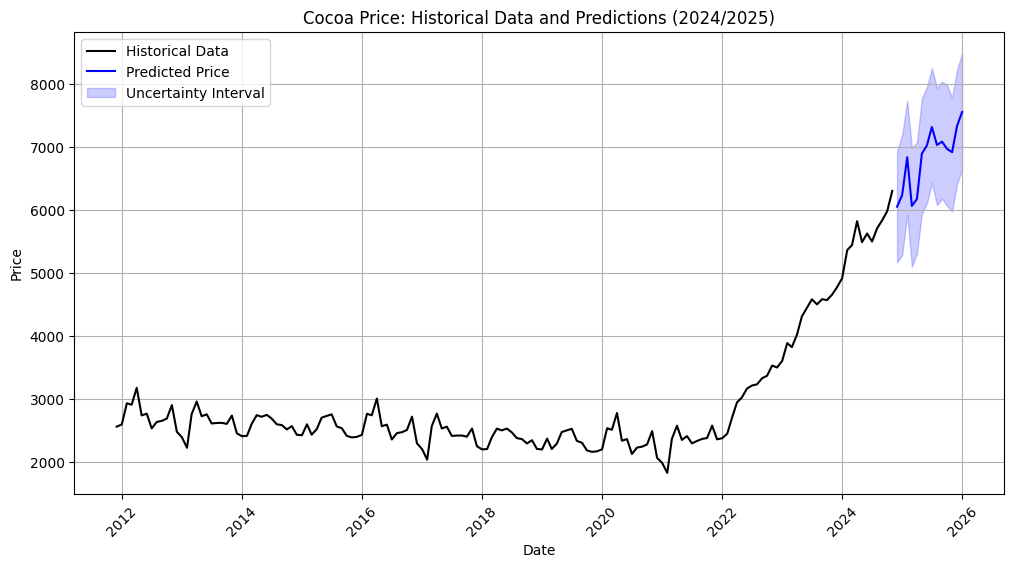

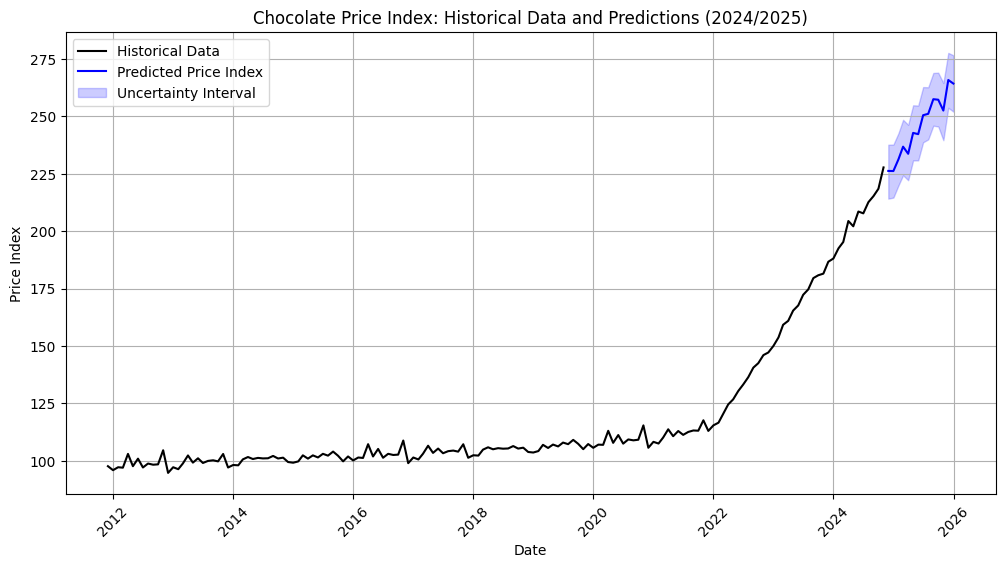

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
cocoa_price_path = 'Cocoa_Price.csv'
chocolate_price_path = 'Chocolate_Price.csv'

# Load and preprocess Cocoa Price data
cocoa_price_data = pd.read_csv(cocoa_price_path, header=0, names=['observation_date', 'Cocoa_Price'])
cocoa_price_data['observation_date'] = pd.to_datetime(cocoa_price_data['observation_date'], format='%d/%m/%Y')
cocoa_price_data.set_index('observation_date', inplace=True)
cocoa_price_data.sort_index(inplace=True)

# Load and preprocess Chocolate Price data
chocolate_price_data = pd.read_csv(chocolate_price_path, header=0, names=['observation_date', 'Chocolate_Price_Index'])
chocolate_price_data['observation_date'] = pd.to_datetime(chocolate_price_data['observation_date'], format='%Y-%m-%d')
chocolate_price_data.set_index('observation_date', inplace=True)
chocolate_price_data.sort_index(inplace=True)

# Prepare data for Prophet
def prepare_prophet_data(series):
    prophet_data = series.reset_index()
    prophet_data.columns = ['ds', 'y']  # Prophet expects columns 'ds' (date) and 'y' (value)
    return prophet_data

# Prepare Cocoa and Chocolate data
cocoa_prophet_data = prepare_prophet_data(cocoa_price_data['Cocoa_Price'])
chocolate_prophet_data = prepare_prophet_data(chocolate_price_data['Chocolate_Price_Index'])

# Prophet Forecasting Function
def prophet_forecast(data, periods=14):  # Ensure it covers from end of 2024 to full 2025
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods, freq='M')  # Extend the timeframe
    forecast = model.predict(future)
    return forecast, model

# Forecast using Prophet
cocoa_prophet_forecast, cocoa_prophet_model = prophet_forecast(cocoa_prophet_data)
chocolate_prophet_forecast, chocolate_prophet_model = prophet_forecast(chocolate_prophet_data)

# Split Historical and Forecast Data
cocoa_historical = cocoa_prophet_forecast[cocoa_prophet_forecast['ds'] <= cocoa_price_data.index[-1]]
cocoa_future = cocoa_prophet_forecast[cocoa_prophet_forecast['ds'] > cocoa_price_data.index[-1]]

chocolate_historical = chocolate_prophet_forecast[chocolate_prophet_forecast['ds'] <= chocolate_price_data.index[-1]]
chocolate_future = chocolate_prophet_forecast[chocolate_prophet_forecast['ds'] > chocolate_price_data.index[-1]]

# Plotting Cocoa Price: Historical + Prediction with Different Colors
plt.figure(figsize=(12, 6))
plt.plot(cocoa_historical['ds'], cocoa_historical['yhat'], label='Historical Data', color='black')
plt.plot(cocoa_future['ds'], cocoa_future['yhat'], label='Predicted Price', color='blue')
plt.fill_between(cocoa_future['ds'],
                 cocoa_future['yhat_lower'],
                 cocoa_future['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')
plt.title('Cocoa Price: Historical Data and Predictions (2024/2025)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Plotting Chocolate Price Index: Historical + Prediction with Different Colors
plt.figure(figsize=(12, 6))
plt.plot(chocolate_historical['ds'], chocolate_historical['yhat'], label='Historical Data', color='black')
plt.plot(chocolate_future['ds'], chocolate_future['yhat'], label='Predicted Price Index', color='blue')
plt.fill_between(chocolate_future['ds'],
                 chocolate_future['yhat_lower'],
                 chocolate_future['yhat_upper'], color='blue', alpha=0.2, label='Uncertainty Interval')
plt.title('Chocolate Price Index: Historical Data and Predictions (2024/2025)')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()


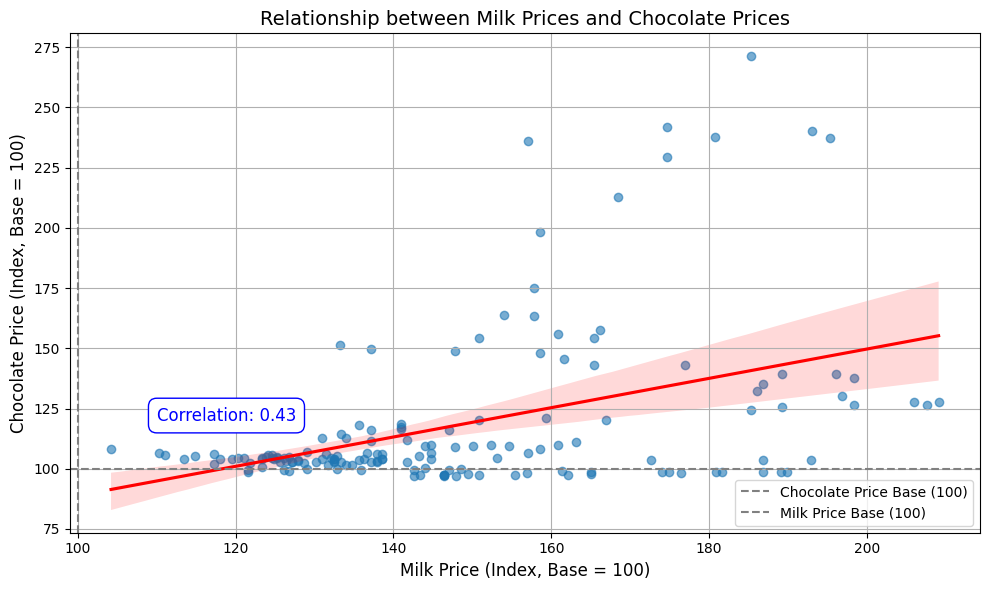

In [ ]:
milk_file_path = 'Milk_Price.csv'
chocolate_file_path = 'Chocolate_Price.csv'
milk_df = pd.read_csv(milk_file_path, names=['observation_date', 'Milk_Price'], header=0)
milk_df['observation_date'] = pd.to_datetime(milk_df['observation_date'])
milk_df.set_index('observation_date', inplace=True)
chocolate_df = pd.read_csv(chocolate_file_path, names=['observation_date', 'Chocolate_Price'], header=0)
chocolate_df['observation_date'] = pd.to_datetime(chocolate_df['observation_date'])
chocolate_df.set_index('observation_date', inplace=True)

# Merge the two datasets on observation_date
merged_data = pd.merge(milk_df, chocolate_df, on='observation_date', how='inner')

# Calculate the correlation coefficient
correlation = merged_data['Milk_Price'].corr(merged_data['Chocolate_Price'])

# Scatter plot with regression line and annotation for base index
plt.figure(figsize=(10, 6))
sns.regplot(x='Milk_Price', y='Chocolate_Price', data=merged_data, scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})

# Add titles and labels
plt.title('Relationship between Milk Prices and Chocolate Prices', fontsize=14)
plt.xlabel('Milk Price (Index, Base = 100)', fontsize=12)
plt.ylabel('Chocolate Price (Index, Base = 100)', fontsize=12)

# Annotate the base index (100) for both axes
plt.axhline(y=100, color='gray', linestyle='--', label='Chocolate Price Base (100)')
plt.axvline(x=100, color='gray', linestyle='--', label='Milk Price Base (100)')

# Annotate the correlation coefficient on the plot
plt.text(110, 120, f'Correlation: {correlation:.2f}', fontsize=12, color='blue', bbox=dict(facecolor='white', edgecolor='blue', boxstyle='round,pad=0.5'))

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()